In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi

In [8]:
pip install windrose

In [9]:
from windrose import WindroseAxes

**Importamos os dados de um arquivo Excel**

In [10]:
df = pd.read_excel('./PortoAlegre.xlsx')

df

,Estação,Data,HoraUTC,VelVento,DirVento(°),dia,mês,ano
0,Porto Alegre,2019-12-01,0,1.9,165,1,12,2019
1,Porto Alegre,2019-12-01,1,1.2,116,1,12,2019
2,Porto Alegre,2019-12-01,2,2.8,143,1,12,2019
3,Porto Alegre,2019-12-01,3,0.9,54,1,12,2019
4,Porto Alegre,2019-12-01,4,0.4,187,1,12,2019
...,...,...,...,...,...,...,...,...
739,Porto Alegre,2019-12-31,19,1.5,299,31,12,2019
740,Porto Alegre,2019-12-31,20,1.5,330,31,12,2019
741,Porto Alegre,2019-12-31,21,2.0,285,31,12,2019
742,Porto Alegre,2019-12-31,22,0.9,87,31,12,2019


**Geramos um gráfico de pontos de velocidade x vs. velocidade y**

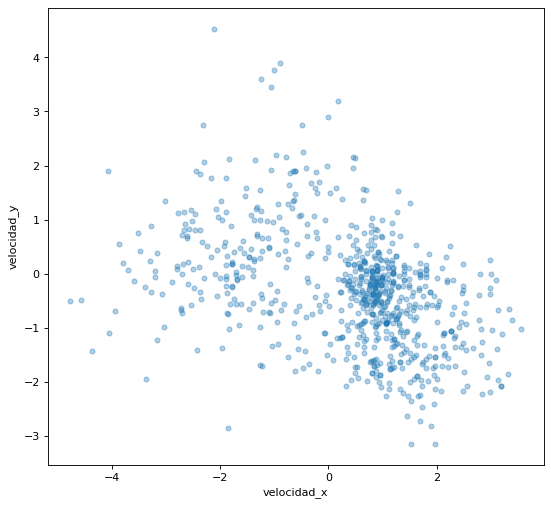

In [11]:
df['velocidad_x'] = df['VelVento'] * np.sin(df['DirVento(°)'] * pi / 180.0)
df['velocidad_y'] = df['VelVento'] * np.cos(df['DirVento(°)'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='velocidad_x', y='velocidad_y', alpha=0.35, ax=ax)

**Apresentamos a Rosa dos Ventos como um Histograma empilhado normatizado (representado em porcentagem)**

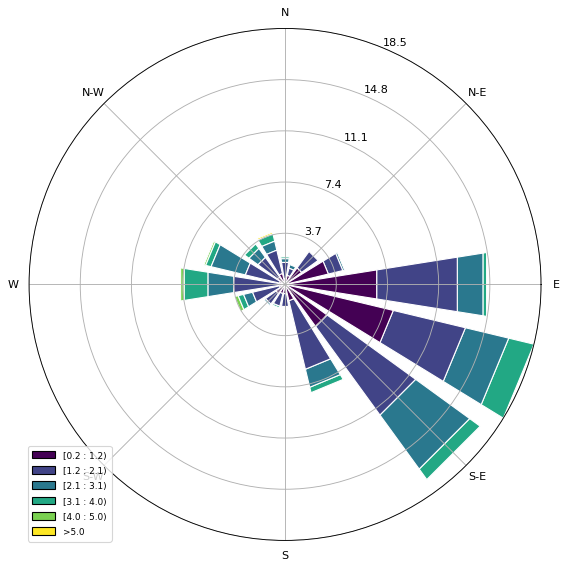

In [12]:
ax = WindroseAxes.from_ax()
ax.bar(df['DirVento(°)'], df['VelVento'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

**Apresentamos a Rosa dos Ventos como um Histograma empilhado normatizado (representado em porcentagem) com preenchimento e mapa de cores definido**

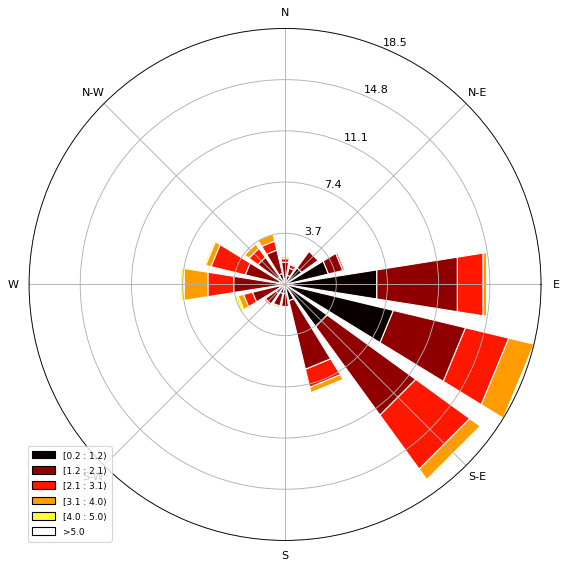

In [13]:
ax = WindroseAxes.from_ax()
ax.bar(df['DirVento(°)'], df['VelVento'], normed=True, opening=0.8, edgecolor='white', cmap=cm.hot)
ax.set_legend()

**Outra forma de representar um Histograma empilhado, não normatizado, mas com intervalos**

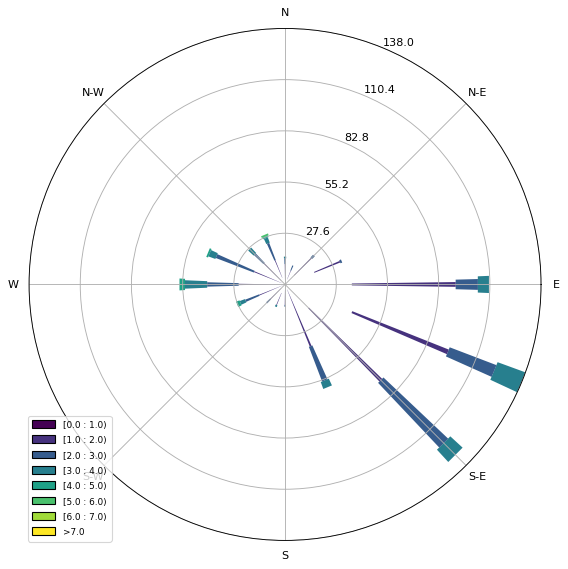

In [14]:
ax = WindroseAxes.from_ax()
ax.box(df['DirVento(°)'], df['VelVento'], bins=np.arange(0, 8, 1))
ax.set_legend()

**A Rosa dos Ventos com preenchimento e mapa de cores definido**

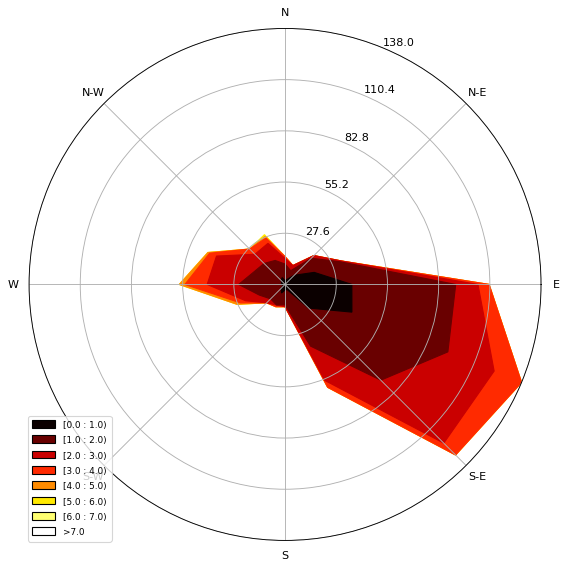

In [15]:
ax = WindroseAxes.from_ax()
ax.contourf(df['DirVento(°)'], df['VelVento'], bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()

**A Rosa dos Ventos com linhas de preenchimento e contorno**

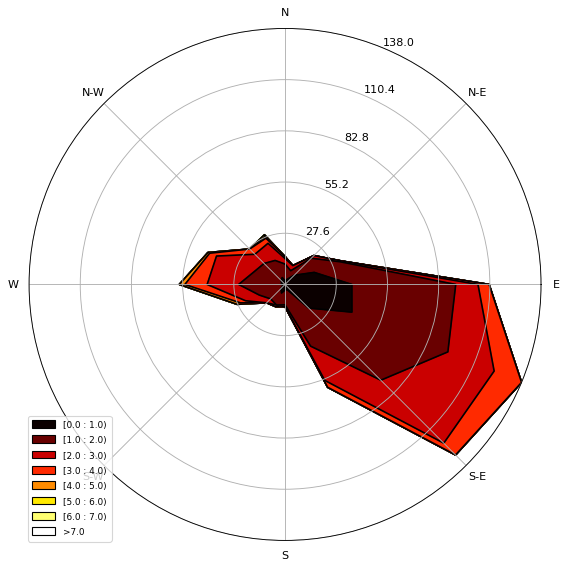

In [16]:
ax = WindroseAxes.from_ax()
ax.contourf(df['DirVento(°)'], df['VelVento'], bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(df['DirVento(°)'], df['VelVento'], bins=np.arange(0, 8, 1), colors='black')
ax.set_legend()

**Rosa dos ventos com linhas de contorno**

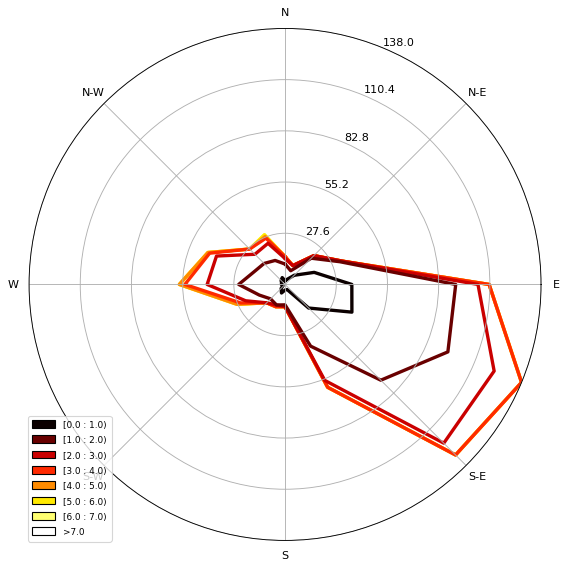

In [22]:
ax = WindroseAxes.from_ax()
ax.contour(df['DirVento(°)'], df['VelVento'], bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend()